# 군집을 사용한 준지도 학습 구현

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 숫자 이미지 데이터 로드
# digits.data - 8x8을 펼친 vector 값
# digits.image - 8x8 2차원 array
digits = datasets.load_digits()
digits.data.shape, digits.images.shape, digits.target.shape

((1797, 64), (1797, 8, 8), (1797,))

- data는 0-9가 순차적으로 반복되는 순서로 섞여 있음

In [2]:
for i in digits.target:
    print(i, end='')

0123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217313917684314053696175447282255488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089301234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908980123456789012345678901234567890955650989841773510022782012633733466649150952820017632174631391768431405369617544728225795488490898012345678901234567890123456789095565098984177351002278201263373346664915095282001763217463139176843140536961754472822579548849089801234567890123456789012345678909556509898417735100227820126337334666491509528200176321746313917684314053696175447282257954884908981234567890123456789012345678909556509898417735127820126337334666491509528200176321463139176843

### data 시각화

Text(0.5, 1.0, 'class = 0')

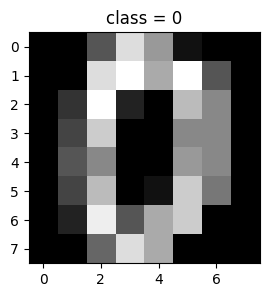

In [3]:
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"class = {digits.target[0]}")

### step 1. 비지도 학습을 이용한 군집화

우선 군집 알고리즘을 사용해 전체 데이터를 여러 클러스터로 나눕니다.   

### step 2. 클러스터내의 가장 많은 레이블을 클러스터의 모든 샘플의 레이블로 적용
그런 다음, 각 클러스터 내에서 레이블이 알려진 샘플의 레이블을 해당 클러스터에 속한 모든 샘플에 할당합니다. 이렇게 하면, 레이블이 없는 샘플들도 레이블을 가지게 되며, 이 정보를 이용해 분류 모델을 학습할 수 있습니다.

In [4]:
# KMeans를 이용해 전체 데이터를 10개의 클러스터로 분할
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
kmeans.fit(digits.data)

KMeans(n_clusters=10, n_init='auto', random_state=42)

In [5]:
kmeans.cluster_centers_.shape

(10, 64)

In [6]:
#각 data point가 어느 cluster에 속하는지 분류
clusters = kmeans.predict(digits.data)
clusters.shape

(1797,)

In [7]:
print("각 cluster 에 속한 datapoint 갯수")
print(np.unique(clusters, return_counts=True))

각 cluster 에 속한 datapoint 갯수
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([264, 180, 180, 175, 151,  29, 179, 152, 208, 279]))


- 처음 180개의 샘플만 레이블이 알려져 있고 나머지 데이터는 레이블이 없다고(-1) 가정

In [8]:
digits.target.shape

(1797,)

In [9]:
known_labels = np.full(digits.target.shape, -1)
known_labels[:170] = digits.target[:170]
known_labels

array([ 0,  1,  2, ..., -1, -1, -1])

In [10]:
# 배열 내 고유 값들과 그 각각의 개수를 반환하고, 이를 출력
print(np.unique(known_labels, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]), array([1627,   18,   16,   16,   16,   16,   19,   17,   16,   17,   19]))


In [11]:
labels_in_cluster = known_labels[clusters == 0]
labels_in_cluster

array([ 1,  2,  8,  1,  8,  1,  8,  8,  1,  1,  2,  2,  8,  1,  2,  1,  2,
        8,  2,  1,  1,  1,  1,  6,  8,  1,  1,  8,  2,  2,  8,  8,  8,  8,
        8,  1,  8,  8,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [12]:
np.unique(labels_in_cluster[labels_in_cluster != -1], return_counts=True)

(array([1, 2, 6, 8]), array([14,  8,  1, 16]))

In [13]:
# cluster i 에 속한 datapoint 들의 known labels 추출
for i in range(10):
    labels_in_cluster = known_labels[clusters == i]
    # np.unique 함수를 사용하여, labels_in_cluster 에서 레이블이 알려진(-1이 아닌) 샘플들의 레이블 등장 횟수를 계산합니다.
    label, count = np.unique(labels_in_cluster[labels_in_cluster != -1], return_counts=True)
    print(f"cluster {i}의 label 종류: {label}, 갯수 {count}")

cluster 0의 label 종류: [1 2 6 8], 갯수 [14  8  1 16]
cluster 1의 label 종류: [6], 갯수 [16]
cluster 2의 label 종류: [3 9], 갯수 [15  1]
cluster 3의 label 종류: [4], 갯수 [16]
cluster 4의 label 종류: [2], 갯수 [7]
cluster 5의 label 종류: [], 갯수 []
cluster 6의 label 종류: [0], 갯수 [18]
cluster 7의 label 종류: [5 8], 갯수 [18  1]
cluster 8의 label 종류: [2 3 7 9], 갯수 [ 1  1 16  1]
cluster 9의 label 종류: [1 5 9], 갯수 [ 2  1 17]


- 각 클러스터에 대해 가장 많은 known label을 찾고, 이 레이블을 해당 클러스터의 대표 레이블로 설정

In [14]:
label, count = np.unique(labels_in_cluster[labels_in_cluster != -1], return_counts=True)
label, count

(array([1, 5, 9]), array([ 2,  1, 17]))

In [15]:
label[np.argmax(count)]

9

In [16]:
# 10개의 클러스터를 위한 레이블 배열을 초기화합니다. 초기 값은 -1로 설정합니다.
cluster_labels = np.full(10, -1)

# 10개의 클러스터 각각에 대해 반복합니다.
for i in range(10):
    # 알려진 레이블 중 현재 클러스터(i)에 속한 샘플들을 선택합니다.
    labels_in_cluster = known_labels[clusters == i]

    # 클러스터 내의 알려진 레이블 중 -1이 아닌 레이블을 추출합니다.
    label, count = np.unique(labels_in_cluster[labels_in_cluster != -1], return_counts=True)

    # 추출된 레이블 중 가장 많은 레이블을 선택합니다.
    if len(label) > 0:
        # 'label' 배열에서 가장 많이 나타난 레이블을 선택합니다.
        cluster_labels[i] = label[np.argmax(count)]

# 각 클러스터에 할당된 대표 레이블을 출력합니다.
cluster_labels

array([ 8,  6,  3,  4,  2, -1,  0,  5,  7,  9])

In [17]:
for i, cl in enumerate(cluster_labels):
    print(f"cluster {i}의 label은 {cl}으로 할당")

cluster 0의 label은 8으로 할당
cluster 1의 label은 6으로 할당
cluster 2의 label은 3으로 할당
cluster 3의 label은 4으로 할당
cluster 4의 label은 2으로 할당
cluster 5의 label은 -1으로 할당
cluster 6의 label은 0으로 할당
cluster 7의 label은 5으로 할당
cluster 8의 label은 7으로 할당
cluster 9의 label은 9으로 할당


- 레이블이 없는 샘플(known_labels == -1)에 대해, 해당 샘플이 속한 클러스터의 레이블을 할당

In [18]:
# 레이블이 알려지지 않은(즉, -1인) 데이터 포인트들을 찾습니다.
# 이들 데이터 포인트에 대해 해당 데이터 포인트가 속한 클러스터의 레이블을 할당합니다.
known_labels[known_labels == -1] = cluster_labels[clusters[known_labels == -1]]

# 이제 'known_labels'에는 원래 알려진 레이블과 클러스터링을 통해 추론된 레이블이 모두 포함됩니다.
# 여기서 고유한 레이블 값들과 그들의 개수를 반환하고, 이를 출력하여 확인합니다.
np.unique(known_labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([ 29, 179,  16, 160, 180, 175, 152, 181, 205, 242, 278]))

In [19]:
# 원래의 digits.target과 비교해 봅니다.
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

군집화에 의해 할당한 label과 원래의 label 간의 정확도 비교

In [20]:
sum(known_labels == digits.target) / len(digits.target)

0.8007790762381747